In [ ]:
!pip install lime
import numpy as np
import cv2
import pandas as pd
import PIL.Image as Image
import os

from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import load_model
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import mark_boundaries


In [ ]:
def proc_img(img_path):
  "process the image"
  # `img` is a PIL image of size 224x224
  img = image.load_img(img_path, target_size=(224, 224))

  # `x` is a float32 Numpy array of shape (224, 224, 3)
  x_img = image.img_to_array(img, dtype='double')

  # We add a dimension to transform our array into a matrix
  # of size (1, 224, 224, 3)
  x_img = np.expand_dims(x_img, axis=0)

  # Finally we preprocess the batch
  # (this does channel-wise color normalization)
  #x_img = preprocess_input(x_img)
  x_img = preprocess_input(x_img)
  return x_img

In [ ]:
model = load_model('/content/model.h5',custom_objects={'KerasLayer': hub.KerasLayer})

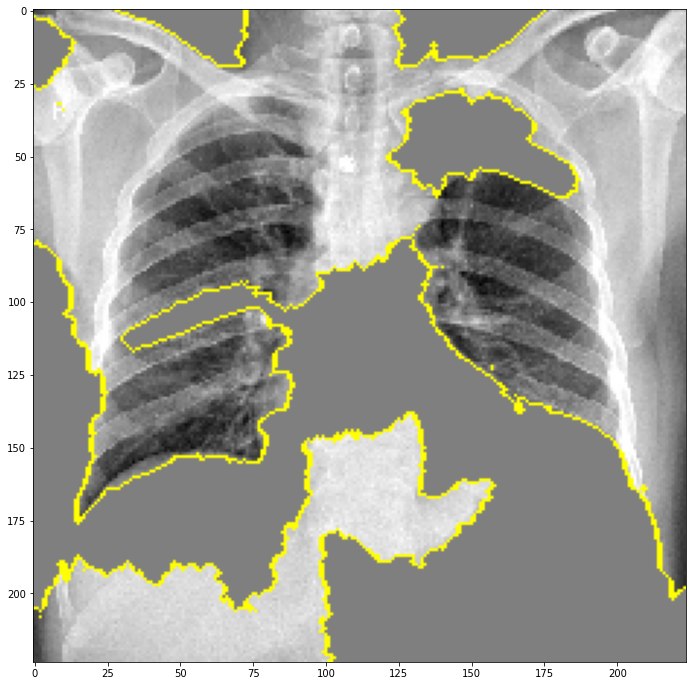

In [ ]:
p1 = proc_img('/content/73c08b6efeac411a439eb28d4c1aa0a1.jpeg')

explainer = LimeImageExplainer()
explanation = explainer.explain_instance(p1[0], model.predict,
                                         top_labels=1, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True,
                                            num_features=15, hide_rest=True,
                                            min_weight=0.0000004)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.imshow(mark_boundaries(tempp, mask))


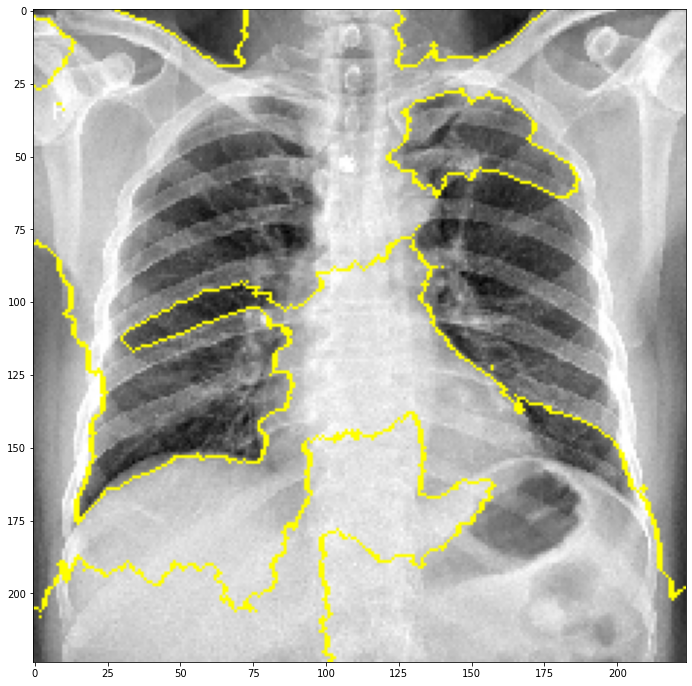

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True,
                                            num_features=15, hide_rest=False,
                                            min_weight=0.0000004)

tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
plt.imshow(mark_boundaries(tempp, mask))

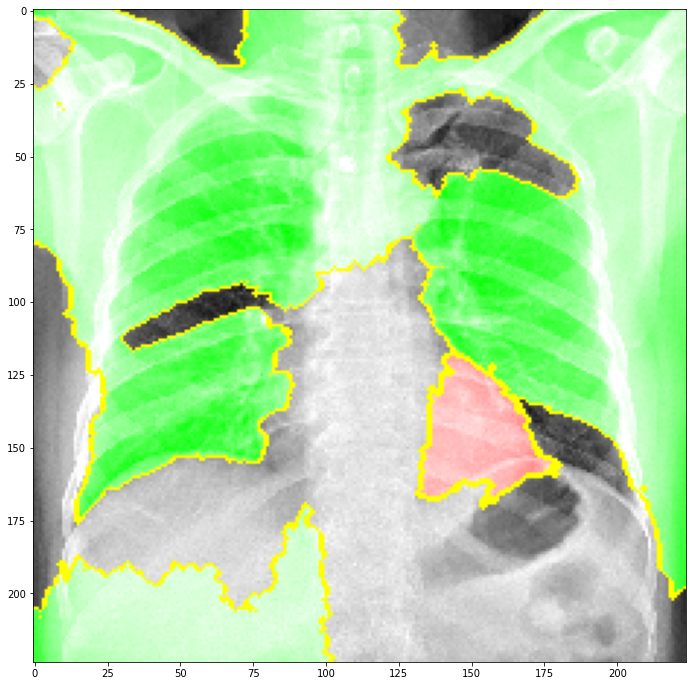

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False,
                                            num_features=15, hide_rest=False,
                                            min_weight=0.0000004)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
plt.imshow(mark_boundaries(tempp, mask))
